# <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS6: Estimación espectral. Ventaneo de la información.

#### Pablo Romero


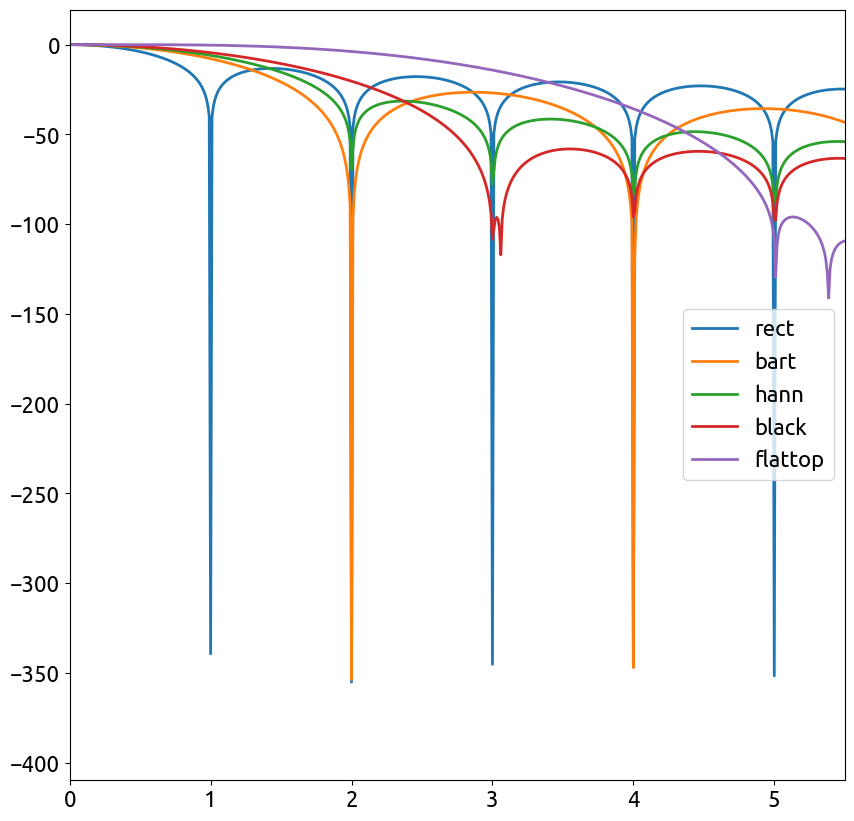

In [28]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.signal as sig

import pandas
from pandas import DataFrame
from IPython.display import HTML


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################
 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal as sig

from pandas import DataFrame
from IPython.display import HTML

# import basic_units as bu

# from basic_units import radians
# import pdsmodulos asph pds

# def mi_funcion_sen (vmax, dc, ff, ph, nn, fs):
      
# tt= np.arange()

   
#     return (tt, xx)
vmax=1       #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]
f0=1 #Frecuencia en [Hz][]
ph=np.pi*1   #Fase [rad]
nn=1000  #Muestras del ADC
fs=1000#Frecuencia de muestreio del ADC [Hz]
k0=nn/4
f0=k0*fs/nn #Frecuencia en [Hz][]         
Ts=1/fs
delta_f=fs/nn
B_bits=4
vf=2


# vmax=np.sqrt(2)

amplitud=1
zero_padd = 100
Wbins=3

## El factor de proporcionalidad en la normalizacion es 
Omega0 = np.pi/2


tt = np.arange(0.0, nn/fs, 1/fs)
tt = tt.reshape(1, tt.shape[0])
ff= np.arange(0.0, fs, fs/((zero_padd+1)*nn))
ff = ff.reshape(1,ff.shape[0])


# arg = Omega1*fs*tt
# xx_sen_mat=np.sin(arg)*amplitud
# xx_sen_mat=1



# xx_sen_mat = np.append(xx_sen_mat, np.zeros(zero_padd*nn))
# xx_sen_mat = xx_sen_mat.reshape(-1,1)


#Creo las distintas ventanas
win_Rectangular=sig.windows.boxcar(nn).reshape(1,nn)
win_Bartlett=np.bartlett(nn).reshape(1,nn)
win_Hann=np.hanning(nn).reshape(1,nn)
win_Blackman=np.blackman(nn).reshape(1,nn)
win_Flattop=sig.windows.flattop(nn).reshape(1,nn)

# xx_rect=xx_sen_mat*win_Rectangular
# xx_bart=xx_sen_mat*win_Bartlett
# xx_hann=xx_sen_mat*win_Hann
# xx_black=xx_sen_mat*win_Blackman
# xx_flattop=xx_sen_mat*win_Flattop

win_Rectangular = np.append(win_Rectangular, np.zeros([1,zero_padd*nn]),axis=-1)
win_Bartlett = np.append(win_Bartlett, np.zeros([1,zero_padd*nn]),axis=-1)
win_Hann = np.append(win_Hann, np.zeros([1,zero_padd*nn]),axis=-1)
win_Blackman = np.append(win_Blackman, np.zeros([1,zero_padd*nn]),axis=-1)
win_Flattop = np.append(win_Flattop, np.zeros([1,zero_padd*nn]),axis=-1)


# XX_sen_mat=fft(xx_sen_mat/xx_sen_mat.shape[1], axis=-1)

W_rect = np.transpose(fft(win_Rectangular/win_Rectangular.shape[1], axis=-1))
W_bart = np.transpose(fft(win_Bartlett/win_Bartlett.shape[1], axis=-1))
W_hann = np.transpose(fft(win_Hann/win_Hann.shape[1], axis=-1))
W_black = np.transpose(fft(win_Blackman/win_Blackman.shape[1], axis=-1))
W_flattop = np.transpose(fft(win_Flattop/win_Flattop.shape[1], axis=-1))

#Normalizo para lograr los 0db

W_rect = np.abs(W_rect) / np.abs(W_rect[0])
W_bart = np.abs(W_bart) / np.abs(W_bart[0])
W_hann = np.abs(W_hann) / np.abs(W_hann[0])
W_black = np.abs(W_black) / np.abs(W_black[0])
W_flattop =np.abs(W_flattop) / np.abs(W_flattop[0])


W_rec_db = 20* np.log10(W_rect)
W_bart_db = 20* np.log10(W_bart)
W_hann_db = 20* np.log10(W_hann)
W_black_db = 20* np.log10(W_black)
W_flattop_db = 20* np.log10(W_flattop)



plt.figure(1)
plt.clf()

# Generar matriz de estimadores
# medianas=

# Sesgo = np.median(Estimadores) - amplitud 
# Varianza(np.mean())

ff= np.arange(0.0, fs, fs/((zero_padd+1)*nn))

bfreq = ff < 5

plt.plot(ff, W_rec_db, lw=2,label='rect')
plt.plot( ff, W_bart_db, lw=2,label='bart')
plt.plot( ff, W_hann_db, lw=2,label='hann')
plt.plot( ff, W_black_db, lw=2,label='black')
plt.plot( ff,W_flattop_db, lw=2,label='flattop')

plt.xlim([0,5.5])
# plt.ylim([-110,1])

axes_hdl = plt.gca()
axes_hdl.legend()

# plt.plot(tt, xx_rect[0,:])
# plt.plot(tt, xx_bart[0,:])

# plt.plot(tt, xx_black[0,:])

# plt.plot(tt, xx_hann[0,:])  
# plt.plot(tt, xx_flattop[0,:])


# plt.figure(2)
# plt.clf()


# plt.plot( ff, (2*np.abs((W_rect))**2), lw=2,label='rect')
# # plt.plot( ff, (2*np.abs((W_bart))**2), lw=2,label='bart')
# # plt.plot( ff, (2*np.abs((W_hann))**2), lw=2,label='hann')
# # plt.plot( ff, (2*np.abs((W_black))**2), lw=2,label='black')
# # plt.plot( ff, (2*np.abs((W_flattop))**2), lw=2,label='flattop')

#     # plt.plot( rad, 10* np.log10(2*np.abs((XX_3d[0,:,:]))**2), lw=2)

# axes_hdl = plt.gca()
# axes_hdl.legend()

plt.legend()

plt.show()





In [30]:
#Con un poco de inspeccion visual en los graficos, limitamos la busqueda de valores
#a frecuencias menor al 2do cero de la ventana mas ancha, donde van a estar incluidos los puntos pedidos.
bfreq = ff < 6 



#Ubico la posicion de los ceros en el rango de bfreq.

rec_w0 = np.where(W_rec_db[bfreq] < -100)[0]

#Ubico la posicion en donde caen -3db en el primer lobulo.
rec_w1=  np.where(W_rec_db[bfreq] < -3)[0]

#Se que el 2do lobulo esta entre el primer cero y el 2do cero. Asi que me fijo
#donde esta el maximo entre esos dos valores.

rec_2nd_max = np.argmax(W_rec_db[rec_w0[0]:rec_w0[1]]) + rec_w0[0]

#Teniendo las posiciones de interes, guardo los valores a mostrar en dichas variables.

rec_w0= ff[rec_w0[0]]
rec_w1= ff[rec_w1[0]]
rec_2nd_max = W_rec_db[rec_2nd_max][0]

#Ahora repito este procedimiento para las demas ventanas:
    
bart_w0 = np.where(W_bart_db[bfreq] < -100)[0]
bart_w1=  np.where(W_bart_db[bfreq] < -3)[0]
bart_2nd_max = np.argmax(W_bart_db[bart_w0[0]:bart_w0[1]]) + bart_w0[0]
bart_w0= ff[bart_w0[0]]
bart_w1= ff[bart_w1[0]]
bart_2nd_max = W_bart_db[bart_2nd_max][0]


hann_w0 = np.where(W_hann_db[bfreq] < -70)[0]
hann_w1=  np.where(W_hann_db[bfreq] < -3)[0]
hann_2nd_max = np.argmax(W_hann_db[hann_w0[0]:hann_w0[1]]) + hann_w0[0]
hann_w0= ff[hann_w0[0]]
hann_w1= ff[hann_w1[0]]
hann_2nd_max = W_hann_db[hann_2nd_max][0]

black_w0 = np.where(W_black_db[bfreq] < -95)[0]
black_w1=  np.where(W_black_db[bfreq] < -3)[0]
black_2nd_max = np.argmax(W_black_db[black_w0[0]:black_w0[1]]) + black_w0[0]
black_w0= ff[black_w0[0]]
black_w1= ff[black_w1[0]]
black_2nd_max = W_black_db[black_2nd_max][0] 

flattop_w0 = np.where(W_flattop_db[bfreq] < -104)[0]
flattop_w1=  np.where(W_flattop_db[bfreq] < -3)[0]
flattop_2nd_max = np.argmax(W_flattop_db[flattop_w0[0]:flattop_w0[1]]) + flattop_w0[0]
flattop_w0= ff[flattop_w0[0]]
flattop_w1= ff[flattop_w1[0]]
flattop_2nd_max = W_flattop_db[flattop_2nd_max][0]


#Armamos la tabla para presentar los datos

Resultados = [
                 [rec_w0,rec_w1,rec_2nd_max],
                 [bart_w0,bart_w1,bart_2nd_max],
                 [hann_w0,hann_w1,hann_2nd_max],
                 [black_w0,black_w1,black_2nd_max],
                 [flattop_w0,flattop_w1,flattop_2nd_max],
            ]
                

df_slice = DataFrame(Resultados, columns=['$\Omega_0$', '$\Omega_1$', '$W_2$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top',
                     ])

# pandas.set_option('display.max_colwidth', 1)
HTML(df_slice.to_html(col_space = '200px', justify = 'center'))

,$\Omega_0$,$\Omega_1$,$W_2$
Rectangular,1.0,0.445545,-13.262321
Bartlett,2.0,0.643564,-26.522951
Hann,3.0,0.722772,-78.033683
Blackman,3.0,0.821782,-108.427144
Flat-top,5.0,1.871287,-108.585510




Fin del documento